<a href="https://colab.research.google.com/github/PengjunHou/CSE437-RL/blob/main/lab4_dyna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: TD and Dyna




## Exercise 1: Implement SARSA with n-step TD (n=5) on CliffWalking

**Objective:**  
In this exercise, you will implement the **SARSA algorithm** using **n-step temporal-difference learning with n=5**. You will apply your implementation to the **CliffWalking environment** in Gymnasium, and analyze how multi-step returns influence learning compared to standard 1-step SARSA.

---

### Environment
- Use `CliffWalking-v1`

---

### Instructions
1. Implement **SARSA with n-step TD updates (n=5)**:
   - Maintain an action-value table \(Q(s,a)\).
   - Use ε-greedy exploration.
   - Store states, actions, and rewards for the last 5 steps.
   - After each step, compute the n-step return: G_t
   - Update \(Q(s_t,a_t)\) toward \(G_t\).

2. Train your agent for several thousand episodes (e.g., 5,000).

3. Plot the **episode rewards over time** to visualize learning progress.

4. Compare qualitatively with 1-step SARSA:
   - Does n-step SARSA converge faster or slower?
   - How do the policies differ near the cliff?

---

### Deliverables
- Python code implementing SARSA with TD(5) (notebook in Github).  
- A plot of episode number vs episode return (plot in a cell below).  
- A short discussion (1 paragraph) comparing the results with standard SARSA.  


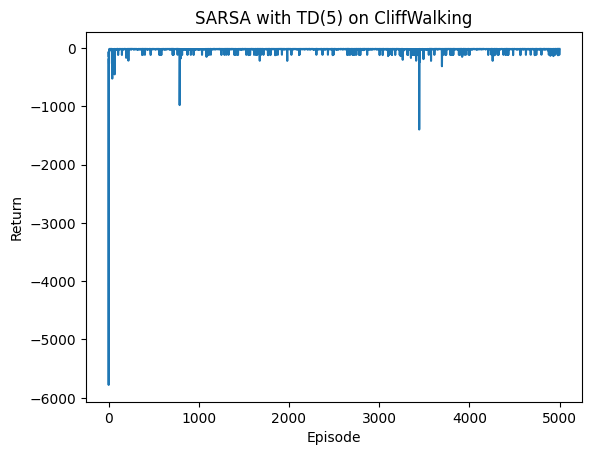

In [9]:
"""
Starter code for Exercise (you can use this code, or extend your code from previous lab)
Implement SARSA with TD(5) on CliffWalking-v1
"""

import numpy as np
import gymnasium as gym
from collections import deque
import matplotlib.pyplot as plt

# Environment
env = gym.make("CliffWalking-v1")

# Parameters
n_states = env.observation_space.n
n_actions = env.action_space.n
alpha = 0.1           # step size (learning rate)
gamma = 0.99          # discount factor
epsilon = 0.1         # epsilon for epsilon-greedy policy
n_step = 5            # number of steps for TD(n)
n_episodes = 5000

# Initialize Q-table
Q = np.zeros((n_states, n_actions))

def epsilon_greedy(state):
    """Choose an action using epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(Q[state])

# Track returns
episode_returns_td5 = []

for ep in range(n_episodes):
    state, _ = env.reset()
    action = epsilon_greedy(state)

    # Buffers to store the trajectory
    states = deque()
    actions = deque()
    rewards = deque()

    T = float("inf")
    t = 0
    G = 0
    done = False

    while True:
        if t < T:
            # Take real step in the environment
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            states.append(state)
            actions.append(action)
            rewards.append(reward)

            if done:
                T = t + 1
            else:
                next_action = epsilon_greedy(next_state)
                state = next_state
                action = next_action

        # Time index for state/action to update
        tau = t - n_step + 1
        if tau >= 0:
            # TODO: Compute the n-step return G for state tau
            # Hint: use rewards[tau : tau+n] plus Q(s_t+n, a_t+n) if not terminal

            # Example structure:
            G = 0.0
            # accumulate discounted rewards
            for i in range(tau, min(tau + n_step, T)):
                G += (gamma ** (i - tau)) * rewards[i]
            if tau + n_step < T:
                # print(f"tau: {tau}, n_step: {n_step}, len(states): {len(states)}")
                s_tau_n = states[tau + n_step - 1]
                a_tau_n = actions[tau + n_step - 1]
                G += (gamma ** n_step) * Q[s_tau_n, a_tau_n]

            # TODO: Update Q[states[tau], actions[tau]] toward G
            Q[states[tau], actions[tau]] += alpha * (G - Q[states[tau], actions[tau]])

        if tau == T - 1:
            break

        t += 1

    episode_returns_td5.append(sum(rewards))

# Plot learning curve
plt.plot(episode_returns_td5)
plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("SARSA with TD(5) on CliffWalking")
plt.show()


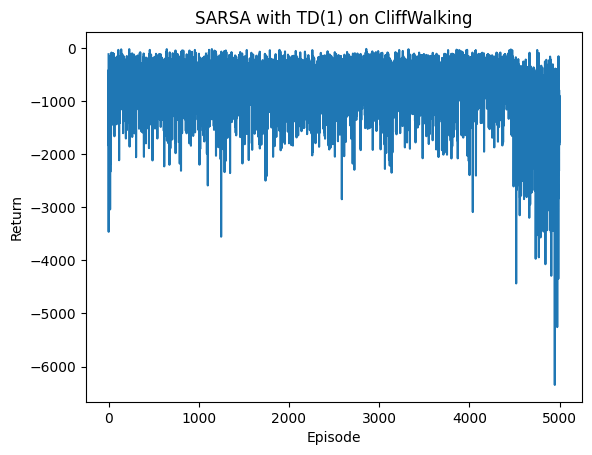

In [10]:

# Environment
env = gym.make("CliffWalking-v1")

# Parameters
n_states = env.observation_space.n
n_actions = env.action_space.n
alpha = 0.1           # step size (learning rate)
gamma = 0.99          # discount factor
epsilon = 0.1         # epsilon for epsilon-greedy policy
n_step = 1            # number of steps for TD(n)
n_episodes = 5000

# Initialize Q-table
Q = np.zeros((n_states, n_actions))

# Track returns
episode_returns_td1 = []

for ep in range(n_episodes):
    state, _ = env.reset()
    action = epsilon_greedy(state)

    # Buffers to store the trajectory
    states = deque()
    actions = deque()
    rewards = deque()

    T = float("inf")
    t = 0
    G = 0
    done = False

    while True:
        if t < T:
            # Take real step in the environment
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            states.append(state)
            actions.append(action)
            rewards.append(reward)

            if done:
                T = t + 1
            else:
                next_action = epsilon_greedy(next_state)
                state = next_state
                action = next_action

        # Time index for state/action to update
        tau = t - n_step + 1
        if tau >= 0:
            # TODO: Compute the n-step return G for state tau
            # Hint: use rewards[tau : tau+n] plus Q(s_t+n, a_t+n) if not terminal

            # Example structure:
            G = 0.0
            # accumulate discounted rewards
            for i in range(tau, min(tau + n_step, T)):
                G += (gamma ** (i - tau)) * rewards[i]
            if tau + n_step < T:
                # print(f"tau: {tau}, n_step: {n_step}, len(states): {len(states)}")
                s_tau_n = states[tau + n_step - 1]
                a_tau_n = actions[tau + n_step - 1]
                G += (gamma ** n_step) * Q[s_tau_n, a_tau_n]

            # TODO: Update Q[states[tau], actions[tau]] toward G
            Q[states[tau], actions[tau]] += alpha * (G - Q[states[tau], actions[tau]])

        if tau == T - 1:
            break

        t += 1

    episode_returns_td1.append(sum(rewards))

# Plot learning curve
plt.plot(episode_returns_td1)
plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("SARSA with TD(1) on CliffWalking")
plt.show()


(1) SARSA with TD(5) converges faster and more stably compared to the standard 1-step SARSA.

(2) n-step SARSA learns safer policies that keep the agent away from the cliff, while 1-step SARSA policies are riskier and lead to frequent falls.

## Exercise 2: Dyna-Q for CliffWalking

**Objective**  
Implement **Dyna-Q** on **CliffWalking-v1** and compare its learning performance to **SARSA (1-step)** and **SARSA TD(5)**. You will analyze sample efficiency, stability near the cliff, and sensitivity to planning steps.

---

### Environment
- Use `CliffWalking-v1`
---

### Part A — Dyna-Q (Implementation)
1. **Q-table**: maintain `Q[s, a]` (tabular).
2. **Model**: learn an empirical model from experience.
   - For each observed transition `(s, a, r, s')`, update a dictionary:
     - Minimal: store the most recent `(s', r)` for `(s, a)`, **or**
     - Advanced: store a **multiset** of outcomes for `(s, a)` with counts (to sample stochastically).
3. **Real update (Q-learning)** after each env step:
   Q(s,a) ← Q(s,a) + α * (r + γ * max_a' Q(s',a') - Q(s,a))
4. **Planning updates**: after each real step, perform `N` simulated updates:
   - Sample a previously seen `(s_p, a_p)` from the model.
   - Sample `(r_p, s'_p)` from that entry.
   - Apply the same Q-learning backup using `(s_p, a_p, r_p, s'_p)`.
5. Use epsilon-greedy exploration.

---

### Part B — Baselines (Re-use / Implement)
- **SARSA (1-step)** with ε-greedy:
  \[
  Q(s,a) \leftarrow Q(s,a) + \alpha\big[r + \gamma Q(s',a') - Q(s,a)\big]
  \]
- **SARSA TD(5)** (n-step SARSA with \(n=5\)), as in Exercise 1.

Use the **same** γ, α, ε schedule, and number of episodes for a fair comparison.

---

### Part C — Experiments & Comparisons
1. **Learning curves**: plot **episode index vs. episode return** for:
   - Dyna-Q with \(N \in \{5, 20, 50\}\)
   - SARSA (1-step)
   - SARSA TD(5)
2. **Sample efficiency**: report the **episode number** at which the average return over a sliding window (e.g., 100 episodes) first exceeds a chosen threshold (e.g., −30).
3. **Stability near the cliff**: qualitatively inspect trajectories/policies; does the method hug the cliff or leave a safer margin?
4. **Sensitivity to planning steps**: compare Dyna-Q across N; discuss diminishing returns vs. computation.
5. **Statistical robustness**: run **≥5 seeds**; plot mean ± std (shaded) or report mean ± std of final returns.

---

### Deliverables
- **Code**: A driver script/notebook that reproduces your plots
- **Plots** (embedded in the notebook):
  - Learning curves (mean ± std across seeds)
  - Optional: heatmap of greedy policy/actions on the grid




### Exercise 2: Part A

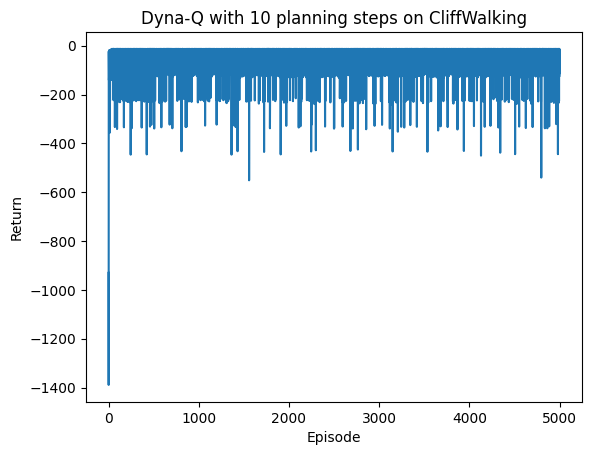

In [11]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from collections import defaultdict

# Environment
env = gym.make("CliffWalking-v1")

# Parameters
n_states = env.observation_space.n
n_actions = env.action_space.n
alpha = 0.1           # learning rate
gamma = 0.99          # discount factor
epsilon = 0.1         # epsilon for epsilon-greedy
n_episodes = 5000
n_planning = 10       # number of planning steps per real step

# Initialize Q-table
Q = np.zeros((n_states, n_actions))

# Initialize model: dictionary mapping (s, a) -> (s', r)
model = defaultdict(lambda: None)

episode_returns_q = []

for ep in range(n_episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False

    while not done:
        # Choose action
        action = epsilon_greedy(state)

        # Real step
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Q-learning update
        Q[state, action] += alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action]
        )

        # Update model
        model[(state, action)] = (next_state, reward)

        # Planning updates
        for _ in range(n_planning):
            # Sample a previously seen (s, a)
            s_p, a_p = list(model.keys())[np.random.randint(len(model))]
            s_next, r_p = model[(s_p, a_p)]
            Q[s_p, a_p] += alpha * (
                r_p + gamma * np.max(Q[s_next]) - Q[s_p, a_p]
            )

        state = next_state
        total_reward += reward

    episode_returns_q.append(total_reward)

# Plot learning curve
plt.plot(episode_returns_q)
plt.xlabel("Episode")
plt.ylabel("Return")
plt.title(f"Dyna-Q with {n_planning} planning steps on CliffWalking")
plt.show()


### Exercise 2: Part B

From the following figure, Dyna-Q achieves the fastest and most stable convergence, SARSA TD(5) shows moderate stability, while SARSA (1-step) learns much slower with higher variance and frequent large drops near the cliff.

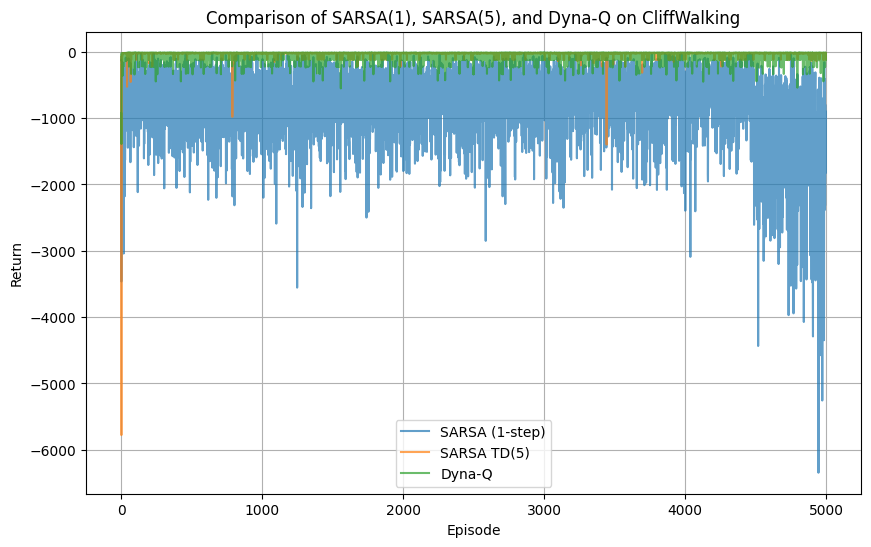

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(episode_returns_td1, label="SARSA (1-step)", alpha=0.7)
plt.plot(episode_returns_td5, label="SARSA TD(5)", alpha=0.7)
plt.plot(episode_returns_q, label="Dyna-Q", alpha=0.7)

plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Comparison of SARSA(1), SARSA(5), and Dyna-Q on CliffWalking")
plt.legend()
plt.grid(True)
plt.show()


###Exercise 2: Part C

In [16]:
def epsilon_greedy(Q, state, epsilon=0.1):
    """Choose an action using epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(Q[state])

def run_dynaq(n_planning):
    """Run Dyna-Q with a given number of planning steps."""
    Q = np.zeros((n_states, n_actions))
    model = defaultdict(lambda: None)
    episode_returns = []

    for ep in range(n_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False

        while not done:
            # Choose action
            action = epsilon_greedy(Q, state, epsilon)

            # Real step
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            # Q-learning update
            Q[state, action] += alpha * (
                reward + gamma * np.max(Q[next_state]) - Q[state, action]
            )

            # Update model
            model[(state, action)] = (next_state, reward)

            # Planning updates
            for _ in range(n_planning):
                s_p, a_p = list(model.keys())[np.random.randint(len(model))]
                s_next, r_p = model[(s_p, a_p)]
                Q[s_p, a_p] += alpha * (
                    r_p + gamma * np.max(Q[s_next]) - Q[s_p, a_p]
                )

            state = next_state
            total_reward += reward

        episode_returns.append(total_reward)

    return episode_returns

# Run Dyna-Q with N = 5, 20, 50
returns_dynaq_5 = run_dynaq(5)
returns_dynaq_20 = run_dynaq(20)
returns_dynaq_50 = run_dynaq(50)


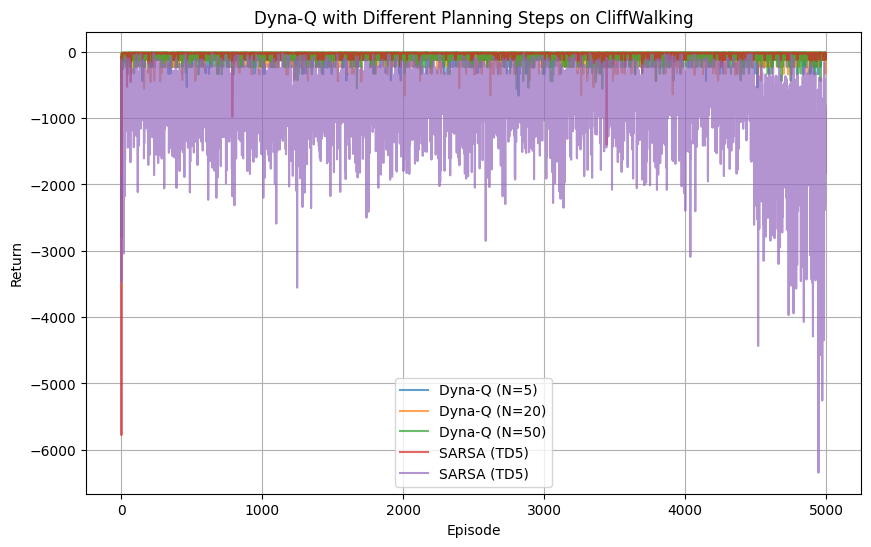

In [17]:
# Plot learning curves
plt.figure(figsize=(10,6))
plt.plot(returns_dynaq_5, label="Dyna-Q (N=5)", alpha=0.7)
plt.plot(returns_dynaq_20, label="Dyna-Q (N=20)", alpha=0.7)
plt.plot(returns_dynaq_50, label="Dyna-Q (N=50)", alpha=0.7)
plt.plot(episode_returns_td5, label="SARSA (TD5)", alpha=0.7)
plt.plot(episode_returns_td1, label="SARSA (TD5)", alpha=0.7)

plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Dyna-Q with Different Planning Steps on CliffWalking")
plt.legend()
plt.grid(True)
plt.show()

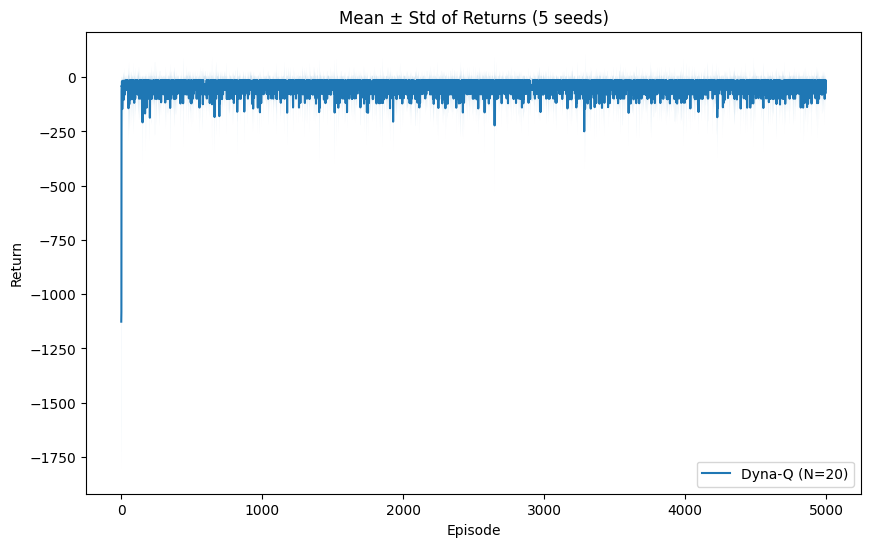

In [22]:
def run_multiple_seeds(run_func, n_seeds=5, *args, **kwargs):


    all_runs = []
    for seed in range(n_seeds):
        np.random.seed(seed)
        returns = run_func(*args, **kwargs)
        all_runs.append(returns)
    return all_runs

def mean_std_plot(all_runs, label):
    """
    Plot mean ± std from multiple runs.
    """
    all_runs = np.array(all_runs)   # shape: [n_seeds, n_episodes]
    mean = np.mean(all_runs, axis=0)
    std = np.std(all_runs, axis=0)
    episodes = np.arange(len(mean))
    plt.plot(episodes, mean, label=label)
    plt.fill_between(episodes, mean-std, mean+std, alpha=0.2)

runs_dynaq_20 = run_multiple_seeds(run_dynaq, n_seeds=5, n_planning=20)

plt.figure(figsize=(10,6))
mean_std_plot(runs_dynaq_20, "Dyna-Q (N=20)")
plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Mean ± Std of Returns (5 seeds)")
plt.legend()
plt.show()

## Exercise 3: Solve FrozenLake with Q-Learning and Dyna-Q (Stochastic Model)

**Objective**  
Implement and compare **Q-learning** and **Dyna-Q** on Gymnasium’s `FrozenLake-v1`.  
For Dyna-Q, your learned **transition model must handle multiple possible next states** per `(s, a)` (stochastic slip), i.e., store and sample **a distribution** over `(s', r)` outcomes rather than a single next state.

---

### Environment
- Use `FrozenLake-v1` from `gymnasium.envs.toy_text`.
- You can start with map 4×4; and then work with 8×8.
- Start → Goal with slippery transitions (stochastic).  
- Rewards: `+1` at goal, `0` otherwise (holes terminate with 0).

---

### Part A — Q-learning (baseline)
1. Maintain a tabular action-value function `Q[s, a]`.
2. Behavior: ε-greedy over `Q`.
3. Update after each real step:
   - target = r + γ * max_a' Q[s', a']   (if terminal: target = r)
   - Q[s, a] ← Q[s, a] + α * (target − Q[s, a])
4. Train for several thousand episodes (e.g., 5,000) with an ε schedule (e.g., 0.2 → 0.01).

---

### Part B — Dyna-Q with a **stochastic transition model**
1. **Empirical model (multinomial):** for each `(s, a)`, maintain a multiset of observed outcomes:
   - `model[(s, a)] = [(s'_1, r_1, count_1), (s'_2, r_2, count_2), ...]`
   - Update counts whenever you observe `(s, a, r, s')`.
2. **Real step update (Q-learning):** same as Part A.
3. **Planning steps (N per real step):**
   - Sample a previously seen `(s_p, a_p)` uniformly (or with priority).
   - Sample `(s'_p, r_p)` **from the empirical distribution** for `(s_p, a_p)` using counts as probabilities.
   - Apply the same Q-learning backup with `(s_p, a_p, r_p, s'_p)`.
4. Train with the same ε schedule and number of episodes; vary `N ∈ {5, 20, 50}`.

---

### Experiments & Analysis
1. **Learning curves:** plot episode index vs episode return (smoothed) for:
   - Q-learning
   - Dyna-Q (N=5, 20, 50)
2. **Sample efficiency:** report the episode at which the moving-average return (e.g., window 100) first exceeds a threshold (you choose a reasonable value).
3. **Effect of stochastic modeling:** briefly explain why storing a distribution over `(s', r)` matters on FrozenLake (slip), and what happens if you store only the most recent outcome.
4. **Robustness:** run ≥5 random seeds; report mean ± std of final evaluation returns.

---

### Deliverables
- **Code** for Q-learning and Dyna-Q (with stochastic model).  
- **Plots** of learning curves (include legend and axis labels).  
- ** Discussion:** why Dyna-Q helps here; impact of N; importance of modeling multiple next states.

---

### Hints
- For terminal transitions (goal/hole), the Q-learning target is simply `target = r` (no bootstrap).  
- When sampling from the model, use probabilities `p_i = count_i / sum_j count_j`.  
- Tie-break greedy action selection uniformly among argmax actions to avoid bias.  
- Keep evaluation **greedy (ε=0)** and consistent across methods (same seeds and episode counts).


### Exercise 3 Part A

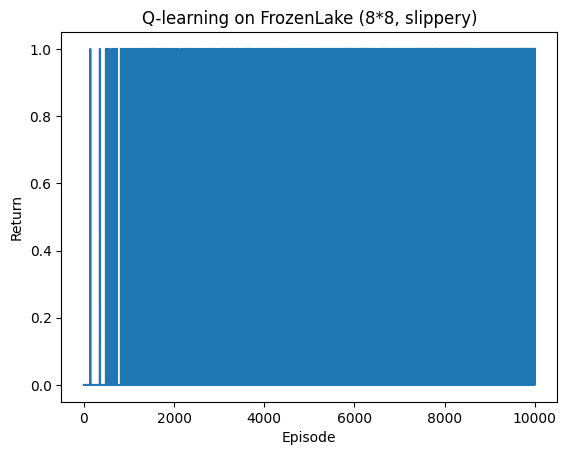

In [38]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Environment (4x4 FrozenLake, slippery/stochastic)
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=True)

# Parameters
n_states = env.observation_space.n
n_actions = env.action_space.n
alpha = 0.1           # learning rate
gamma = 0.99          # discount factor
epsilon_start = 0.5   # initial epsilon
epsilon_end = 0.01    # final epsilon
n_episodes = 10000

# Q-table
Q = np.zeros((n_states, n_actions))

def epsilon_greedy(state, epsilon):
    """Choose action using epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(Q[state])

episode_returns = []

for ep in range(n_episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    # Linearly decay epsilon
    epsilon = max(epsilon_end, epsilon_start - (epsilon_start - epsilon_end) * ep / n_episodes)

    while not done:
        action = epsilon_greedy(state, epsilon)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Q-learning update
        target = reward + gamma * np.max(Q[next_state]) * (not done)
        Q[state, action] += alpha * (target - Q[state, action])

        state = next_state
        total_reward += reward
    episode_returns.append(total_reward)

# Plot learning curve
plt.plot(episode_returns)
plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Q-learning on FrozenLake (8*8, slippery)")
plt.show()


### Exercise 3 Part B

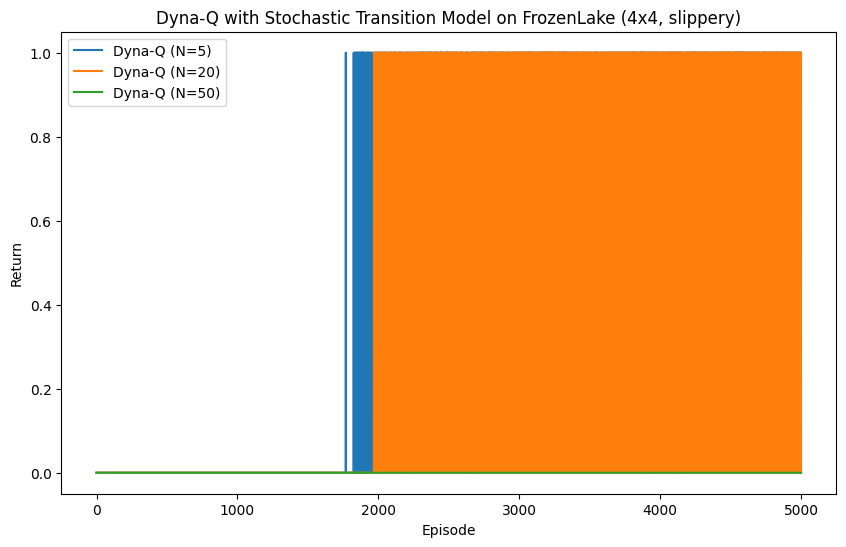

In [39]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from collections import defaultdict

# Environment (FrozenLake, slippery)
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=True)

# Parameters
n_states = env.observation_space.n
n_actions = env.action_space.n
alpha = 0.1
gamma = 0.99
epsilon_start = 0.2
epsilon_end = 0.01
n_episodes = 5000

def epsilon_greedy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(Q[state])

def run_dynaq_stochastic(n_planning):
    Q = np.zeros((n_states, n_actions))
    # Model: dict[(s,a)] = list of (s′, r, count)
    model = defaultdict(list)
    episode_returns = []

    for ep in range(n_episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        # Epsilon schedule
        epsilon = max(epsilon_end, epsilon_start - (epsilon_start - epsilon_end) * ep / n_episodes)

        while not done:
            # ε-greedy action
            action = epsilon_greedy(Q, state, epsilon)

            # Real step
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            # --- Real Q-learning update ---
            target = reward + gamma * np.max(Q[next_state]) * (not done)
            Q[state, action] += alpha * (target - Q[state, action])

            # --- Update stochastic model ---
            found = False
            for i, (s_p, r_p, count) in enumerate(model[(state, action)]):
                if s_p == next_state and r_p == reward:
                    model[(state, action)][i] = (s_p, r_p, count + 1)
                    found = True
                    break
            if not found:
                model[(state, action)].append((next_state, reward, 1))

            # --- Planning updates ---
            for _ in range(n_planning):
                # sample a past (s,a)
                s_p, a_p = list(model.keys())[np.random.randint(len(model))]
                outcomes = model[(s_p, a_p)]

                # get distribution from counts
                counts = np.array([c for (_, _, c) in outcomes])
                probs = counts / counts.sum()
                idx = np.random.choice(len(outcomes), p=probs)
                s_next, r_p, _ = outcomes[idx]

                # Q-learning update with sampled outcome
                target = r_p + gamma * np.max(Q[s_next])
                Q[s_p, a_p] += alpha * (target - Q[s_p, a_p])

            state = next_state
            total_reward += reward

        episode_returns.append(total_reward)

    return episode_returns

# Run for N ∈ {5,20,50}
returns_dynaq_5 = run_dynaq_stochastic(5)
returns_dynaq_20 = run_dynaq_stochastic(20)
returns_dynaq_50 = run_dynaq_stochastic(50)

# Plot
plt.figure(figsize=(10,6))
plt.plot(returns_dynaq_5, label="Dyna-Q (N=5)")
plt.plot(returns_dynaq_20, label="Dyna-Q (N=20)")
plt.plot(returns_dynaq_50, label="Dyna-Q (N=50)")
plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Dyna-Q with Stochastic Transition Model on FrozenLake (4x4, slippery)")
plt.legend()
plt.show()


### Exercise 3 Analysis

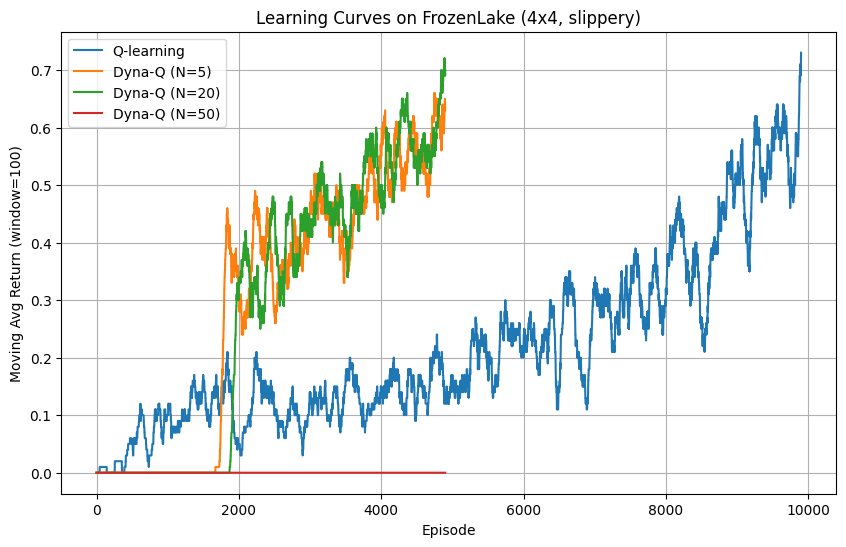

In [41]:
def moving_average(data, window=100):
    return np.convolve(data, np.ones(window)/window, mode="valid")

plt.figure(figsize=(10,6))
plt.plot(moving_average(episode_returns, 100), label="Q-learning")
plt.plot(moving_average(returns_dynaq_5, 100), label="Dyna-Q (N=5)")
plt.plot(moving_average(returns_dynaq_20, 100), label="Dyna-Q (N=20)")
plt.plot(moving_average(returns_dynaq_50, 100), label="Dyna-Q (N=50)")
plt.xlabel("Episode")
plt.ylabel("Moving Avg Return (window=100)")
plt.title("Learning Curves on FrozenLake (4x4, slippery)")
plt.legend()
plt.grid(True)
plt.show()

Stochastic modeling helps Dyna-Q learn robust policies in environments with uncertainty. Storing only the most recent outcome makes the model biased and may fail in stochastic transitions.

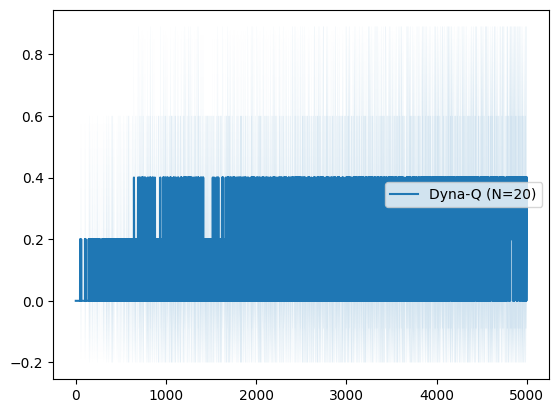

In [42]:
def run_multiple_seeds(run_func, n_seeds=5, *args, **kwargs):
    all_runs = []
    for seed in range(n_seeds):
        np.random.seed(seed)
        returns = run_func(*args, **kwargs)
        all_runs.append(returns)
    return np.array(all_runs)

# Example: run 5 seeds for Dyna-Q (N=20)
runs_dynaq_20 = run_multiple_seeds(run_dynaq_stochastic, n_seeds=5, n_planning=20)

mean = runs_dynaq_20.mean(axis=0)
std = runs_dynaq_20.std(axis=0)

plt.plot(mean, label="Dyna-Q (N=20)")
plt.fill_between(np.arange(len(mean)), mean-std, mean+std, alpha=0.2)
plt.legend()
plt.show()